In [143]:
from astropy.io import fits
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from scipy.ndimage import convolve
from glob import glob
plt.style.use(astropy_mpl_style)

In [144]:
HSC_PIX = 0.17
NOISE_DIST = 1.0


In [155]:
base_path = '/home/jimenez/work/Formation/Astroinfo/Diffusion/'
# Simulated galaxies in local base_path
filenames = glob(osp.join(base_path, "*.fits"))

# Observations relative base_path
# filenames = glob(osp.join(base_path, "hack_images," "cutout*.fits")
psf_filename = './psf_images/psf-calexp-pdr1_udeep-HSC-I-9812-1,6-149.37258-2.63547.fits'

In [156]:
def magnitude_to_flux_in_janskies(magnitude_values):
    """
    See https://en.wikipedia.org/wiki/AB_magnitude
    """
    return 10 ** ((magnitude_values - 8.9) / (-2.5)) / HSC_PIX

def raw_to_ab_magnitude(img_to_conv):
    """
    See comment in "FLUXMAG0" keyword in header fits image HSC
    """
    return 2.5*np.log(flux_mag/img_to_conv)

def create_images(filename):
    with fits.open(filename) as l_hdu:
        img_to_conv = l_hdu[1].data
        l_head = l_hdu[0].header
        d_head = l_hdu[1].header

    flux_mag = np.float32(l_head["FLUXMAG0"])

    shape = (d_head["NAXIS1"], d_head["NAXIS2"])
    ab_mag_image = raw_to_ab_magnitude(img_to_conv)
    jansky_image = magnitude_to_flux_in_janskies(ab_mag_image)
    return [shape, img_to_conv, ab_mag_image, jansky_image]

def load_image(filename):
    with fits.open(filename) as l_hdu:
        img_to_conv = l_hdu[0].data
        l_head = l_hdu[0].header

    shape = (l_head["NAXIS1"], l_head["NAXIS2"])
    return [shape, img_to_conv]


In [157]:
with fits.open(psf_filename) as h_psf:
    psf = h_psf[0].data

Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/shalo_091-634478_v3_photo.fits
With shape: (1300, 1300)
Plotting file /home/jimenez/work/Formation/Astroinfo/Diffusion/shalo_091-521161_v3_photo.fits
With shape: (1423, 1423)


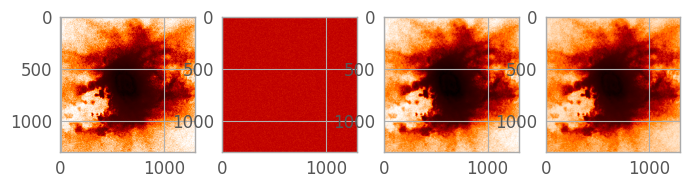

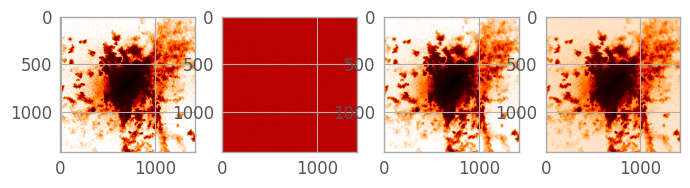

In [158]:
for filename in filenames:
    shape, raw = load_image(filename)
    noise = np.random.normal(1,1,raw.shape)
    conv_image = convolve(raw, psf)
    I_0 = conv_image + noise
    print(f"Plotting file {filename}")
    print(f"With shape: {shape}")
    plt.figure()
    plt.subplot(141)
    plt.imshow(raw)
    plt.subplot(142)
    plt.imshow(noise)
    plt.subplot(143)
    plt.imshow(conv_image)
    plt.subplot(144)
    plt.imshow(conv_image + noise)
    


In [159]:
shape, raw = load_image(filenames[0])   
conv_image = convolve(raw, psf)
conv_image += np.random.normal(1,1,conv_image.shape)

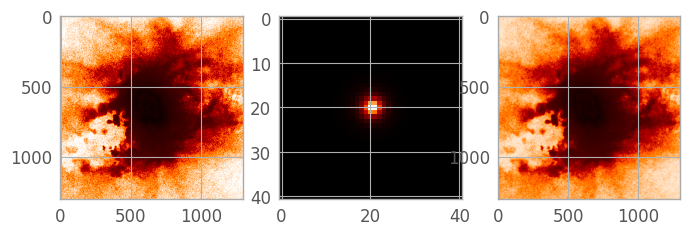

In [160]:
shape, raw = load_image(filenames[0])   
conv_image = convolve(raw, psf)
conv_image += np.random.normal(1,1,conv_image.shape)
plt.figure()
plt.subplot(131)
plt.imshow(raw)
plt.subplot(132)
plt.imshow(psf)
plt.subplot(133)
plt.imshow(conv_image)


In [130]:
conv_image.shape

(715, 715)

In [131]:
shape

(715, 715)